In [ ]:
#Kmeans ++

#Links for silhoutee coef.

#Deep LEarning . NLP

# Prob and Stat : Khan Academy 
The Elements of Statistical Learning 


#Machine Learning : Tom M. Mitchell 

#Feature selection 



In [59]:
import pandas as pd

In [60]:
df=pd.read_csv('movie_metadata1.csv')

In [61]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000
6,Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,...,1902,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0
7,Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387,English,USA,PG,260000000,2010,553,7.8,1.85,29000
8,Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,...,1117,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000
9,Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,...,973,English,UK,PG,250000000,2009,11000,7.5,2.35,10000


In [58]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [86]:
subset=df[['gross','num_user_for_reviews']]

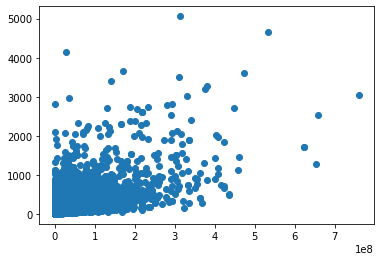

In [87]:
plt.plot(subset['gross'],subset['num_user_for_reviews'],'o')

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [89]:
result=[]
for each in range(2,20):
    kmeans=KMeans(n_clusters=each)
    kmeans.fit(subset)
    groups=kmeans.labels_
    score=silhouette_score(subset,groups)
    result.append( (each,score) )

In [90]:
result

[(2, 0.7711381404323696),
 (3, 0.7069721849103634),
 (4, 0.6738167174407128),
 (5, 0.6693868264124034),
 (6, 0.6710400083012364),
 (7, 0.6648743486472893),
 (8, 0.6652232310577173),
 (9, 0.6527957605292427),
 (10, 0.6525001892422972),
 (11, 0.6563136124831149),
 (12, 0.6586762637280613),
 (13, 0.6589092209912005),
 (14, 0.658993113508642),
 (15, 0.6455097385495066),
 (16, 0.6491473180503882),
 (17, 0.6460233113714641),
 (18, 0.6455976730736223),
 (19, 0.6415963396430124)]

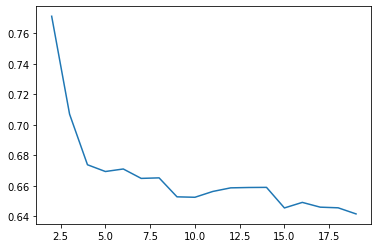

In [91]:
#Elbow Plot
plt.plot(list(zip(*result))[0],list(zip(*result))[1])

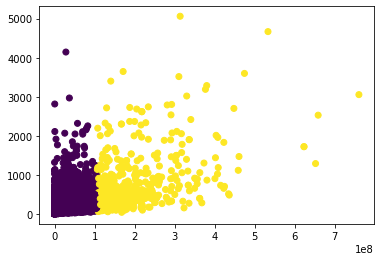

In [100]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(subset)
groups=kmeans.labels_
import matplotlib.pyplot as plt 
plt.scatter(subset['gross'], subset['num_user_for_reviews'], c=groups)  


In [101]:
subset['Label']=groups

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
subset.groupby('Label').describe().transpose().round()

Label                                 0            1
gross                count       4502.0        541.0
                     mean    22054741.0  189075239.0
                     std     26824375.0   91133963.0
                     min           49.0  105807520.0
                     25%       118960.0  126464904.0
                     50%     10507774.0  161029270.0
                     75%     36384751.0  217536138.0
                     max    105500000.0  760505847.0
num_user_for_reviews count       4502.0        541.0
                     mean         214.0        754.0
                     std          261.0        709.0
                     min            1.0         42.0
                     25%           54.0        296.0
                     50%          135.0        515.0
                     75%          274.0        945.0
                     max         4144.0       5060.0

In [97]:
#Decide to go with 5 

kmeans=KMeans(n_clusters=5)
kmeans.fit(df)
groups=kmeans.labels_
import matplotlib.pyplot as plt 
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_,)  



ValueError: could not convert string to float: 'PG'

In [43]:
dataset=df[:]
dataset['Label']=kmeans.labels_

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
dataset.groupby('Label').describe().transpose()

Label                                 0           1          2          3  \
Gender                 count  79.000000   39.000000  23.000000  23.000000   
                       mean    0.582278    0.538462   0.608696   0.608696   
                       std     0.496335    0.505035   0.499011   0.499011   
                       min     0.000000    0.000000   0.000000   0.000000   
                       25%     0.000000    0.000000   0.000000   0.000000   
                       50%     1.000000    1.000000   1.000000   1.000000   
                       75%     1.000000    1.000000   1.000000   1.000000   
                       max     1.000000    1.000000   1.000000   1.000000   
Age                    count  79.000000   39.000000  23.000000  23.000000   
                       mean   43.088608   32.692308  25.521739  45.217391   
                       std    16.478572    3.728650   5.273170  13.228607   
                       min    18.000000   27.000000  18.000000  19.000000   
                       25%    27.000000   30.000000  21.500000  35.500000   
                       50%    47.000000   32.000000  24.000000  46.000000   
                       75%    54.500000   35.500000  30.000000  53.500000   
                       max    70.000000   40.000000  35.000000  67.000000   
Annual Income (k$)     count  79.000000   39.000000  23.000000  23.000000   
                       mean   55.291139   86.538462  26.304348  26.304348   
                       std     8.710665   16.312485   7.893811   7.893811   
                       min    40.000000   69.000000  15.000000  15.000000   
                       25%    48.000000   75.500000  19.500000  19.500000   
                       50%    54.000000   79.000000  25.000000  25.000000   
                       75%    62.000000   95.000000  33.000000  33.000000   
                       max    76.000000  137.000000  39.000000  39.000000   
Spending Score (1-100) count  79.000000   39.000000  23.000000  23.000000   
                       mean   49.569620   82.128205  78.565217  20.913043   
                       std     6.242295    9.364489  10.953729  13.017167   
                       min    35.000000   63.000000  61.000000   3.000000   
                       25%    44.500000   74.500000  73.000000   9.500000   
                       50%    50.000000   83.000000  77.000000  17.000000   
                       75%    55.000000   90.000000  84.500000  33.500000   
                       max    60.000000   97.000000  99.000000  40.000000   

Label                                  4  
Gender                 count   36.000000  
                       mean     0.472222  
                       std      0.506309  
                       min      0.000000  
                       25%      0.000000  
                       50%      0.000000  
                       75%      1.000000  
                       max      1.000000  
Age                    count   36.000000  
                       mean    40.666667  
                       std     11.496583  
                       min     19.000000  
                       25%     34.000000  
                       50%     41.500000  
                       75%     47.250000  
                       max     59.000000  
Annual Income (k$)     count   36.000000  
                       mean    87.750000  
                       std     16.387059  
                       min     70.000000  
                       25%     77.000000  
                       50%     83.000000  
                       75%     97.250000  
                       max    137.000000  
Spending Score (1-100) count   36.000000  
                       mean    17.583333  
                       std     10.204691  
                       min      1.000000  
                       25%     10.000000  
                       50%     16.000000  
                       75%     24.500000  
                       max     39.000000

In [ ]:
# Grammar of Graphics 

#Visualization of Graphs 

